In [1]:
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Flatten, Lambda, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
IMAGE_SIZE = (224, 224)

train_path = "C:\\Users\\Bhargavi\\OneDrive\\Desktop\\dataset\\tomato train"
valid_path = "C:\\Users\Bhargavi\\OneDrive\\Desktop\\dataset\\tomato valid"

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=IMAGE_SIZE,
    batch_size=64,
    class_mode='categorical'
)

valid_generator = validation_datagen.flow_from_directory(
    valid_path,
    target_size=IMAGE_SIZE,
    batch_size=64,
    class_mode='categorical'
)

Found 6185 images belonging to 6 classes.
Found 2649 images belonging to 6 classes.


In [4]:
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(200,200,3))
base_model.trainable = False 

In [5]:
from tensorflow.keras import layers, models

# Define your layers
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(6, activation='softmax')

In [6]:
tl_model = tf.keras.applications.VGG16(include_top=False)
tl_model.trainable = False
inputs = layers.Input(shape=(200, 200, 3), name='input_layer')
x = tl_model(inputs)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(1, activation='relu')(x)
model2= tf.keras.Model(inputs, outputs)

In [7]:
model2.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 20
history = model2.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=epochs
)



Epoch 1/20



C:\Users\Bhargavi\AppData\Roaming\Python\Python311\site-packages\tensorflow\python\util\dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)



97/97 [==============================] - 414s 4s/step - loss: 1.1921e-07 - accuracy: 0.4578 - val_loss: 1.1921e-07 - val_accuracy: 0.3061
Epoch 2/20
97/97 [==============================] - 410s 4s/step - loss: 1.1921e-07 - accuracy: 0.4664 - val_loss: 1.1921e-07 - val_accuracy: 0.3061
Epoch 3/20
97/97 [==============================] - 408s 4s/step - loss: 1.1921e-07 - accuracy: 0.4632 - val_loss: 1.1921e-07 - val_accuracy: 0.3061
Epoch 4/20
97/97 [==============================] - 411s 4s/step - loss: nan - accuracy: 0.7235 - val_loss: nan - val_accuracy: 0.8333
Epoch 5/20
97/97 [==============================] - 408s 4s/step - loss: nan - accuracy: 0.8333 - val_loss: nan - val_accuracy: 0.8333
Epoch 6/20
97/97 [==============================] - 408s 4s/step - loss: nan - accuracy: 0.8333 - val_loss: nan - val_accuracy: 0.8333
Epoch 7/20
97/97 [==============================] - 408s 4s/step - loss: nan - accuracy: 0.8333 - val_loss: nan - val_accuracy: 0.8333
Epoch 8/20
97/97 [=====

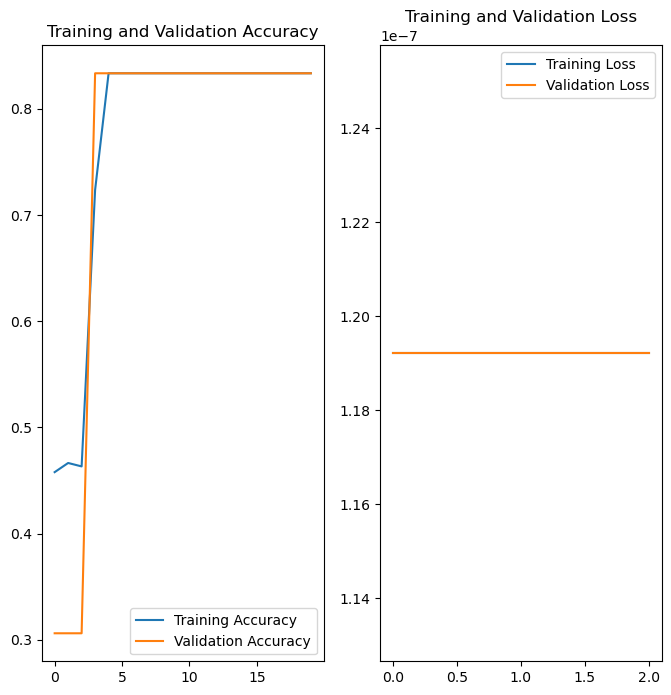

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
        
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [9]:
val_loss, val_acc = model2.evaluate(valid_generator, verbose = 2)

42/42 - 423s - loss: nan - accuracy: 0.8333 - 423s/epoch - 10s/step


In [10]:
import tensorflow as tf
from tensorflow import keras
model_4 = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(200,200,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(6, activation='softmax')  # Changed to 6 classes and softmax activation
])


In [11]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 96)        34944     
                                                                 
 batch_normalization (Batch  (None, 48, 48, 96)        384       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 256)       614656    
                                                                 
 batch_normalization_1 (Bat  (None, 23, 23, 256)       1024      
 chNormalization)                                                
                                                        

In [12]:
model_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history_2 = model_4.fit(
  train_generator,
  validation_data= valid_generator,
  epochs=epochs
)

Epoch 1/20
97/97 [==============================] - 350s 4s/step - loss: 6.9373 - accuracy: 0.4647 - val_loss: 7.6703 - val_accuracy: 0.2110
Epoch 2/20
97/97 [==============================] - 341s 4s/step - loss: 1.3238 - accuracy: 0.5882 - val_loss: 3.8120 - val_accuracy: 0.2680
Epoch 3/20
97/97 [==============================] - 332s 3s/step - loss: 1.0818 - accuracy: 0.6535 - val_loss: 1.3819 - val_accuracy: 0.4994
Epoch 4/20
97/97 [==============================] - 231s 2s/step - loss: 0.7966 - accuracy: 0.7295 - val_loss: 1.0248 - val_accuracy: 0.6436
Epoch 5/20
97/97 [==============================] - 105s 1s/step - loss: 0.5656 - accuracy: 0.7990 - val_loss: 1.4667 - val_accuracy: 0.6044
Epoch 6/20
97/97 [==============================] - 103s 1s/step - loss: 0.5462 - accuracy: 0.8073 - val_loss: 1.6295 - val_accuracy: 0.5357
Epoch 7/20
97/97 [==============================] - 103s 1s/step - loss: 0.5178 - accuracy: 0.8212 - val_loss: 16.6234 - val_accuracy: 0.3182
Epoch 8/20
9

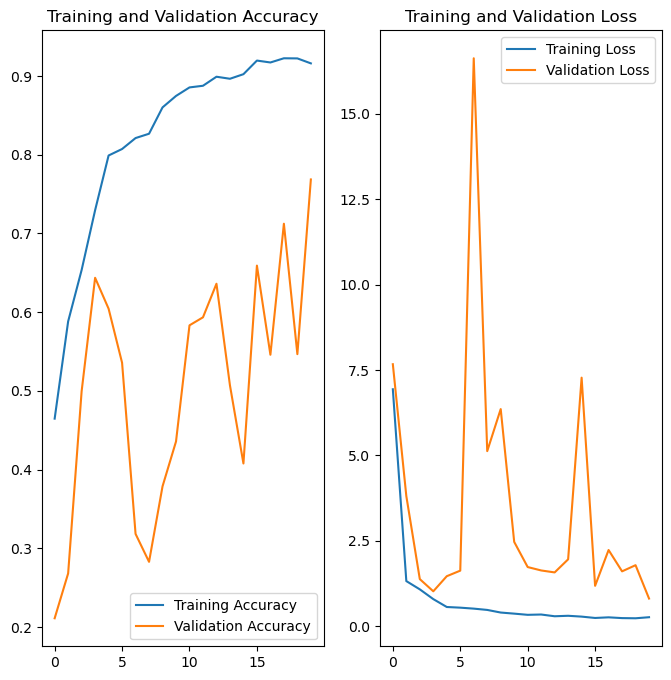

In [13]:
acc = history_2.history['accuracy']
val_acc = history_2.history['val_accuracy']

loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [14]:
val_loss, val_acc = model_4.evaluate(valid_generator, verbose = 2)

42/42 - 10s - loss: 0.8128 - accuracy: 0.7686 - 10s/epoch - 234ms/step
